# <center><font color = "green">PUBG Game Prediction</font></center>

<center><img src = "https://media.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif"></center>

### Table Content 

1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrangle)
4. [Feature Engineering](#feature)
5. [ML - CatBoost Model](#cat)

# <font color = "green">Importing Libraries</font><a class = "anchor" id = "import"></a>

In [1]:
# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<b>command for terminal</b>

- pip install catboost 
- conda install -c conda-forge catboost

<b>command for jupyter</b>

- !pip install catboost 

# <font color = "green">Reading the Data </font><a class = "anchor" id = "read"></a>

In [2]:
# Laod the Dataset

df = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [3]:
# glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# Data Dimension
df.shape

(4446966, 29)

In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Descritption

- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.- 
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# <font color = "green">Data Wrangling</font><a class = "anchor" id = "wrangle"></a>

#### Check for the rows with missing win prediction value 

In [6]:
# check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# remove the data row
df.drop(2744604, inplace = True)
# or,  df = df.drop(2744604)

#### Understanding Players distribution in a game

In [8]:
# prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [9]:
df.head()   # another column "playersJoined"

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


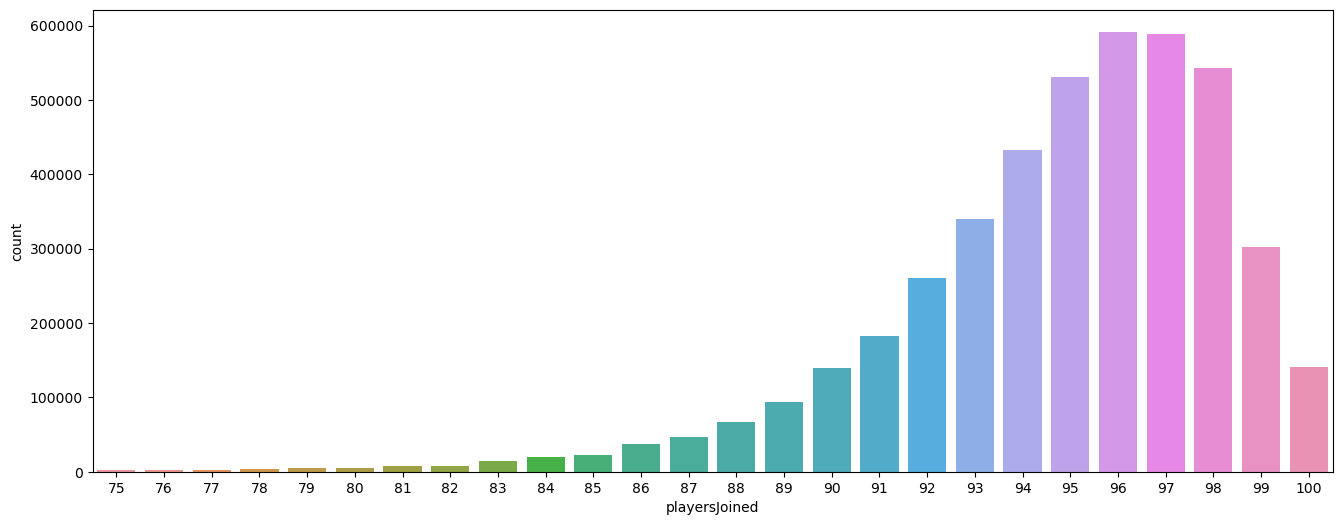

In [10]:
sns.countplot(x = df[df["playersJoined"]>=75]["playersJoined"],data = df)
plt.show()

### Analysing the data

##### Kills Without Moving?

<center><img src = "https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif"></center>

In [11]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [12]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [13]:
df[df['killswithoutMoving'] == True].shape

(1535, 32)

In [14]:
# drop the table 
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

#### Extra-ordinary Road Kills?????

<center><img src = "https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif"></center>

In [15]:
df[df['roadKills'] > 5].shape

(46, 32)

In [16]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

#### So many KILLS - how ????

<center><img src = "https://media.giphy.com/media/3oxHQfzBhpKtgdDWtW/giphy.gif"></center>

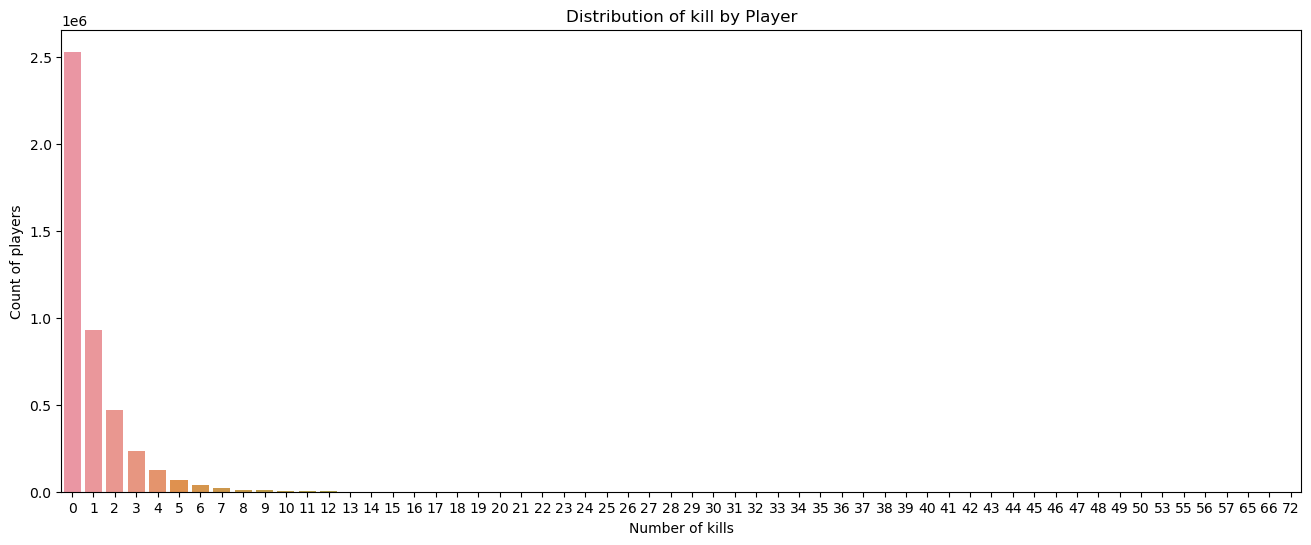

In [17]:
sns.countplot(data = df , x= df["kills"]).set_title("Distribution of kill by Player")
plt.ylabel("Count of players")
plt.xlabel("Number of kills")
plt.show()

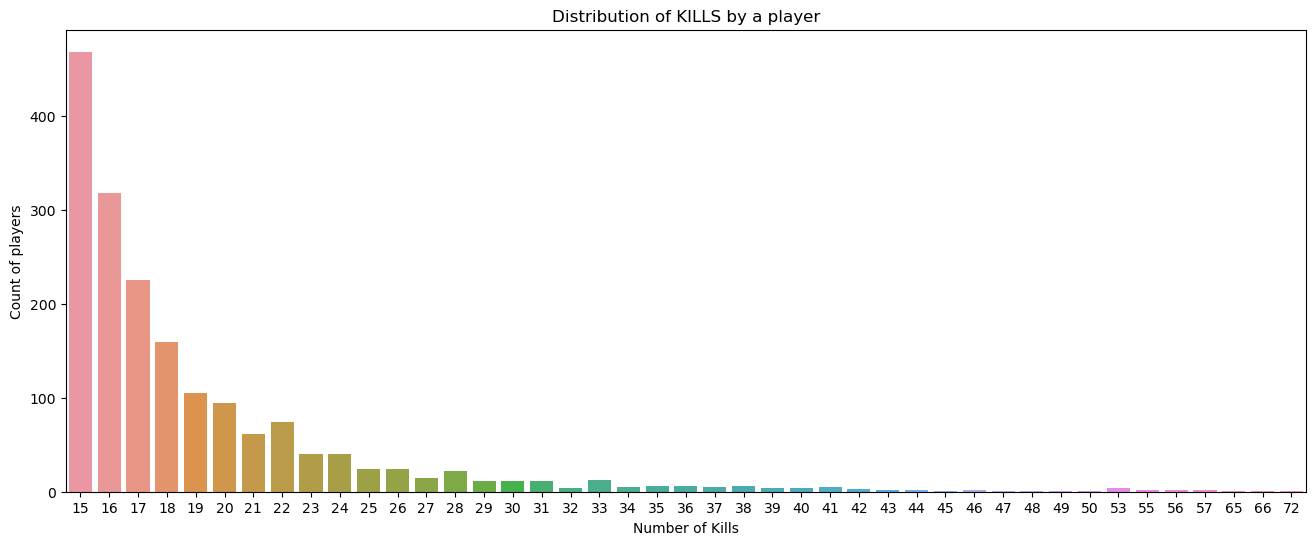

In [18]:
sns.countplot(x = df[df['kills']>=15]['kills'],data = df).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [19]:
# data dimension
df[df['kills'] > 20].shape

(417, 32)

In [20]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

### Head shot

<center><img src = "https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif"></center>

In [21]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

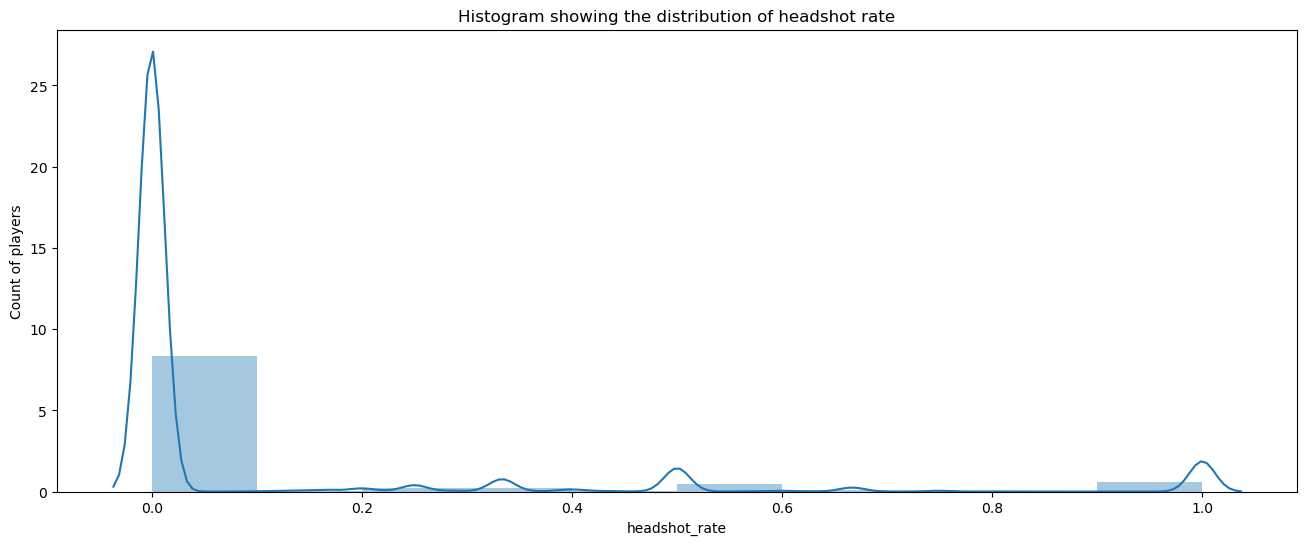

In [22]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()


In [23]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [24]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

#### Longest Shot

<center><img src = "https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif"></center>

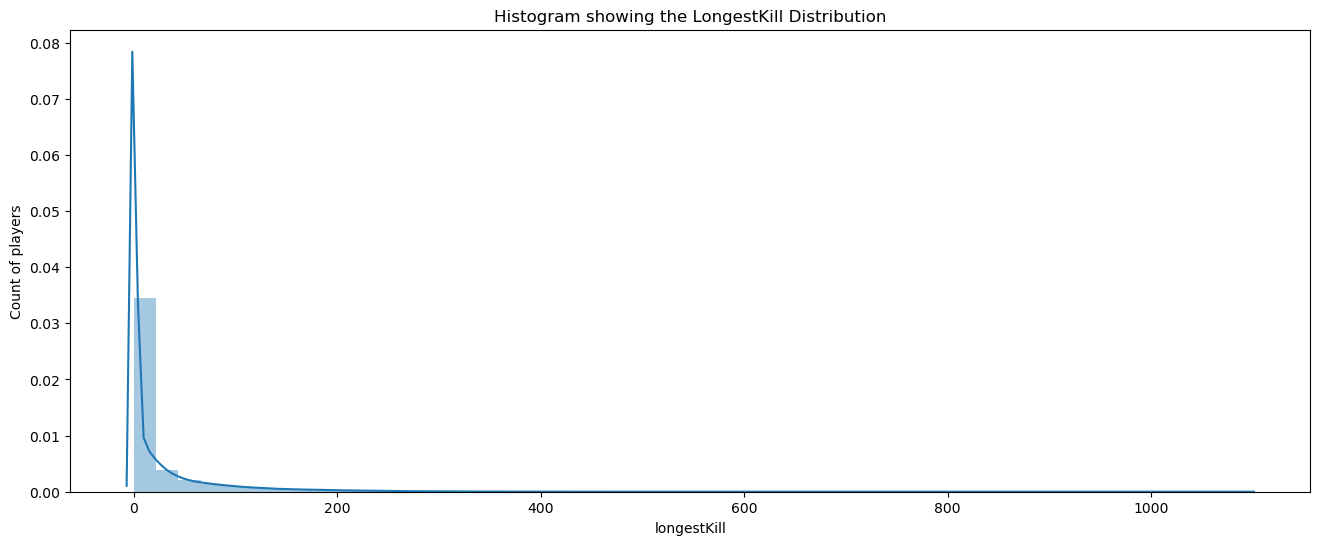

In [25]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [26]:
df[df['longestKill']>=500].shape    # here we remove longestkill that more than 500meter , it consider as anomly

(1747, 33)

In [27]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

### Weapon Change

<center><img src = "https://j.gifs.com/3loOmn.gif"></center>

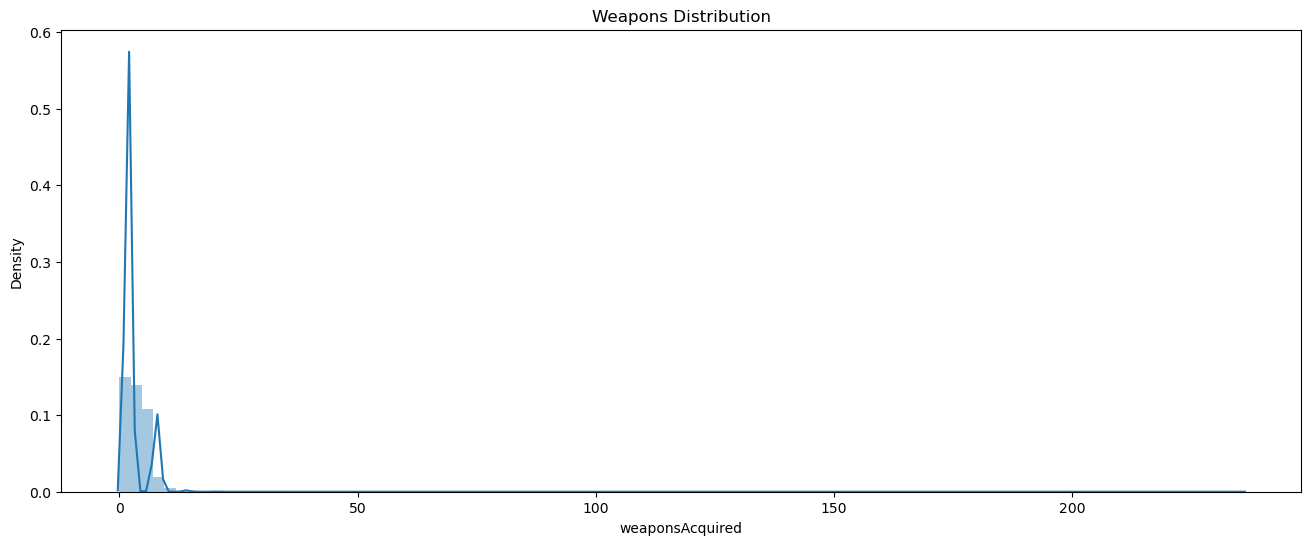

In [28]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [29]:
df[df['weaponsAcquired']>=15].shape    # who change the weapon more than 15, we consider as anomly or using mod apk.

(6809, 33)

In [30]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

### EDA

In [31]:
df.shape

(4436306, 33)

In [32]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436306 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   groupId             object 
 2   matchId             object 
 3   assists             int64  
 4   boosts              int64  
 5   damageDealt         float64
 6   DBNOs               int64  
 7   headshotKills       int64  
 8   heals               int64  
 9   killPlace           int64  
 10  killPoints          int64  
 11  kills               int64  
 12  killStreaks         int64  
 13  longestKill         float64
 14  matchDuration       int64  
 15  matchType           object 
 16  maxPlace            int64  
 17  numGroups           int64  
 18  rankPoints          int64  
 19  revives             int64  
 20  rideDistance        float64
 21  roadKills           int64  
 22  swimDistance        float64
 23  teamKills           int64  
 24  vehicleDestroys     int64  
 

In [34]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

ValueError: could not convert string to float: '7f96b2f878858a'

<Figure size 3000x3000 with 0 Axes>

# <font color = "green">Feature Engineering</font><a class = "anchor" id = "feature"></a>

In [35]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [36]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [37]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [38]:
df = df.drop(columns=['Id', 'groupId', 'matchId'])

In [39]:
data = df.drop(columns = ['assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [40]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# <font color = "green">ML - Catboost Model</font><a class = "anchor" id = "cat"></a>

### Handling categorical data¶

In [53]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [54]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [55]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [56]:
x.shape

(4436306, 40)

In [57]:
features = x.columns

### Scaling the data

In [45]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [46]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936,0.0
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936,0.0


### Splitting data

In [47]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [48]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 40) (3105414,)
(1330892, 40) (1330892,)


## CatBoost Model

In [49]:
import catboost as cb

In [50]:
train_dataset = cb.Pool(xtrain , ytrain)
test_dataset = cb.Pool(xtest , ytest)

In [51]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [52]:
# GRID search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)    # reducing error

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 356ms	remaining: 35.2s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 540ms	remaining: 26.4s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 718ms	remaining: 23.2s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 849ms	remaining: 20.4s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 984ms	remaining: 18.7s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 1.13s	remaining: 17.8s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 1.28s	remaining: 17.1s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 1.43s	remaining: 16.4s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 1.57s	remaining: 15.9s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 1.69s	remaining: 15.2s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 1.81s	remaining: 14.7s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765

94:	learn: 0.1398785	test: 0.1399700	best: 0.1399700 (94)	total: 12.5s	remaining: 660ms
95:	learn: 0.1394478	test: 0.1395405	best: 0.1395405 (95)	total: 12.7s	remaining: 528ms
96:	learn: 0.1390753	test: 0.1391697	best: 0.1391697 (96)	total: 12.8s	remaining: 396ms
97:	learn: 0.1387199	test: 0.1388151	best: 0.1388151 (97)	total: 12.9s	remaining: 264ms
98:	learn: 0.1383766	test: 0.1384732	best: 0.1384732 (98)	total: 13.1s	remaining: 132ms
99:	learn: 0.1380397	test: 0.1381367	best: 0.1381367 (99)	total: 13.2s	remaining: 0us

bestTest = 0.1381366755
bestIteration = 99

0:	loss: 0.1381367	best: 0.1381367 (0)	total: 15.2s	remaining: 3m 47s
0:	learn: 0.5126068	test: 0.5124096	best: 0.5124096 (0)	total: 131ms	remaining: 13s
1:	learn: 0.4671679	test: 0.4669991	best: 0.4669991 (1)	total: 253ms	remaining: 12.4s
2:	learn: 0.4264429	test: 0.4262951	best: 0.4262951 (2)	total: 379ms	remaining: 12.2s
3:	learn: 0.3902182	test: 0.3900853	best: 0.3900853 (3)	total: 508ms	remaining: 12.2s
4:	learn: 0.35816

88:	learn: 0.1174285	test: 0.1176647	best: 0.1176647 (88)	total: 11.6s	remaining: 1.43s
89:	learn: 0.1171031	test: 0.1173483	best: 0.1173483 (89)	total: 11.7s	remaining: 1.3s
90:	learn: 0.1170075	test: 0.1172519	best: 0.1172519 (90)	total: 11.9s	remaining: 1.17s
91:	learn: 0.1169191	test: 0.1171636	best: 0.1171636 (91)	total: 12s	remaining: 1.04s
92:	learn: 0.1168242	test: 0.1170669	best: 0.1170669 (92)	total: 12.1s	remaining: 914ms
93:	learn: 0.1167374	test: 0.1169829	best: 0.1169829 (93)	total: 12.3s	remaining: 784ms
94:	learn: 0.1166427	test: 0.1168850	best: 0.1168850 (94)	total: 12.4s	remaining: 653ms
95:	learn: 0.1165224	test: 0.1167628	best: 0.1167628 (95)	total: 12.6s	remaining: 523ms
96:	learn: 0.1164136	test: 0.1166544	best: 0.1166544 (96)	total: 12.7s	remaining: 392ms
97:	learn: 0.1163231	test: 0.1165631	best: 0.1165631 (97)	total: 12.8s	remaining: 262ms
98:	learn: 0.1162409	test: 0.1164784	best: 0.1164784 (98)	total: 13s	remaining: 131ms
99:	learn: 0.1161663	test: 0.1164067	

82:	learn: 0.1459917	test: 0.1460750	best: 0.1460750 (82)	total: 11.2s	remaining: 9.05s
83:	learn: 0.1453945	test: 0.1454773	best: 0.1454773 (83)	total: 11.3s	remaining: 8.9s
84:	learn: 0.1448061	test: 0.1448892	best: 0.1448892 (84)	total: 11.5s	remaining: 8.77s
85:	learn: 0.1441889	test: 0.1442730	best: 0.1442730 (85)	total: 11.6s	remaining: 8.62s
86:	learn: 0.1436574	test: 0.1437424	best: 0.1437424 (86)	total: 11.7s	remaining: 8.48s
87:	learn: 0.1431242	test: 0.1432099	best: 0.1432099 (87)	total: 11.8s	remaining: 8.33s
88:	learn: 0.1425612	test: 0.1426476	best: 0.1426476 (88)	total: 12s	remaining: 8.19s
89:	learn: 0.1420826	test: 0.1421694	best: 0.1421694 (89)	total: 12.1s	remaining: 8.05s
90:	learn: 0.1416257	test: 0.1417131	best: 0.1417131 (90)	total: 12.2s	remaining: 7.91s
91:	learn: 0.1411888	test: 0.1412785	best: 0.1412785 (91)	total: 12.3s	remaining: 7.77s
92:	learn: 0.1407061	test: 0.1407970	best: 0.1407970 (92)	total: 12.4s	remaining: 7.63s
93:	learn: 0.1402872	test: 0.140378

24:	learn: 0.1445245	test: 0.1446326	best: 0.1446326 (24)	total: 3.1s	remaining: 15.5s
25:	learn: 0.1428209	test: 0.1429318	best: 0.1429318 (25)	total: 3.23s	remaining: 15.4s
26:	learn: 0.1411019	test: 0.1412206	best: 0.1412206 (26)	total: 3.36s	remaining: 15.3s
27:	learn: 0.1397763	test: 0.1398917	best: 0.1398917 (27)	total: 3.49s	remaining: 15.2s
28:	learn: 0.1385976	test: 0.1387311	best: 0.1387311 (28)	total: 3.6s	remaining: 15s
29:	learn: 0.1374581	test: 0.1375932	best: 0.1375932 (29)	total: 3.73s	remaining: 14.9s
30:	learn: 0.1362990	test: 0.1364387	best: 0.1364387 (30)	total: 3.86s	remaining: 14.8s
31:	learn: 0.1354159	test: 0.1355534	best: 0.1355534 (31)	total: 3.97s	remaining: 14.6s
32:	learn: 0.1346504	test: 0.1347928	best: 0.1347928 (32)	total: 4.09s	remaining: 14.5s
33:	learn: 0.1337834	test: 0.1339284	best: 0.1339284 (33)	total: 4.2s	remaining: 14.3s
34:	learn: 0.1330728	test: 0.1332271	best: 0.1332271 (34)	total: 4.32s	remaining: 14.2s
35:	learn: 0.1324924	test: 0.1326522	

118:	learn: 0.1135590	test: 0.1137919	best: 0.1137919 (118)	total: 14.6s	remaining: 3.79s
119:	learn: 0.1134379	test: 0.1136698	best: 0.1136698 (119)	total: 14.7s	remaining: 3.67s
120:	learn: 0.1133694	test: 0.1135985	best: 0.1135985 (120)	total: 14.8s	remaining: 3.55s
121:	learn: 0.1133185	test: 0.1135468	best: 0.1135468 (121)	total: 14.9s	remaining: 3.43s
122:	learn: 0.1132164	test: 0.1134445	best: 0.1134445 (122)	total: 15.1s	remaining: 3.31s
123:	learn: 0.1131634	test: 0.1133929	best: 0.1133929 (123)	total: 15.3s	remaining: 3.21s
124:	learn: 0.1128980	test: 0.1131247	best: 0.1131247 (124)	total: 15.5s	remaining: 3.09s
125:	learn: 0.1126908	test: 0.1129179	best: 0.1129179 (125)	total: 15.6s	remaining: 2.97s
126:	learn: 0.1125661	test: 0.1127893	best: 0.1127893 (126)	total: 15.8s	remaining: 2.85s
127:	learn: 0.1122374	test: 0.1124655	best: 0.1124655 (127)	total: 15.9s	remaining: 2.73s
128:	learn: 0.1121722	test: 0.1123991	best: 0.1123991 (128)	total: 16s	remaining: 2.61s
129:	learn: 

61:	learn: 0.1512431	test: 0.1513749	best: 0.1513749 (61)	total: 12s	remaining: 7.33s
62:	learn: 0.1496426	test: 0.1497763	best: 0.1497763 (62)	total: 12.1s	remaining: 7.12s
63:	learn: 0.1480579	test: 0.1481975	best: 0.1481975 (63)	total: 12.3s	remaining: 6.92s
64:	learn: 0.1465855	test: 0.1467283	best: 0.1467283 (64)	total: 12.5s	remaining: 6.71s
65:	learn: 0.1451749	test: 0.1453197	best: 0.1453197 (65)	total: 12.6s	remaining: 6.49s
66:	learn: 0.1437990	test: 0.1439497	best: 0.1439497 (66)	total: 12.8s	remaining: 6.29s
67:	learn: 0.1425113	test: 0.1426640	best: 0.1426640 (67)	total: 12.9s	remaining: 6.08s
68:	learn: 0.1412931	test: 0.1414479	best: 0.1414479 (68)	total: 13.1s	remaining: 5.89s
69:	learn: 0.1401193	test: 0.1402762	best: 0.1402762 (69)	total: 13.3s	remaining: 5.69s
70:	learn: 0.1389903	test: 0.1391496	best: 0.1391496 (70)	total: 13.4s	remaining: 5.49s
71:	learn: 0.1379014	test: 0.1380643	best: 0.1380643 (71)	total: 13.6s	remaining: 5.29s
72:	learn: 0.1367989	test: 0.13696

54:	learn: 0.1051164	test: 0.1053633	best: 0.1053633 (54)	total: 9.64s	remaining: 7.89s
55:	learn: 0.1047146	test: 0.1049609	best: 0.1049609 (55)	total: 9.82s	remaining: 7.71s
56:	learn: 0.1043936	test: 0.1046379	best: 0.1046379 (56)	total: 9.98s	remaining: 7.53s
57:	learn: 0.1039827	test: 0.1042228	best: 0.1042228 (57)	total: 10.1s	remaining: 7.34s
58:	learn: 0.1036741	test: 0.1039153	best: 0.1039153 (58)	total: 10.3s	remaining: 7.18s
59:	learn: 0.1035171	test: 0.1037603	best: 0.1037603 (59)	total: 10.5s	remaining: 6.99s
60:	learn: 0.1033076	test: 0.1035475	best: 0.1035475 (60)	total: 10.6s	remaining: 6.8s
61:	learn: 0.1031737	test: 0.1034118	best: 0.1034118 (61)	total: 10.8s	remaining: 6.62s
62:	learn: 0.1030069	test: 0.1032452	best: 0.1032452 (62)	total: 10.9s	remaining: 6.42s
63:	learn: 0.1026722	test: 0.1029110	best: 0.1029110 (63)	total: 11.1s	remaining: 6.25s
64:	learn: 0.1025396	test: 0.1027791	best: 0.1027791 (64)	total: 11.3s	remaining: 6.07s
65:	learn: 0.1021174	test: 0.1023

48:	learn: 0.1802725	test: 0.1803352	best: 0.1803352 (48)	total: 9.14s	remaining: 18.8s
49:	learn: 0.1774256	test: 0.1774946	best: 0.1774946 (49)	total: 9.34s	remaining: 18.7s
50:	learn: 0.1747731	test: 0.1748430	best: 0.1748430 (50)	total: 9.52s	remaining: 18.5s
51:	learn: 0.1720982	test: 0.1721771	best: 0.1721771 (51)	total: 9.71s	remaining: 18.3s
52:	learn: 0.1696361	test: 0.1697189	best: 0.1697189 (52)	total: 9.89s	remaining: 18.1s
53:	learn: 0.1672795	test: 0.1673655	best: 0.1673655 (53)	total: 10.1s	remaining: 17.9s
54:	learn: 0.1649087	test: 0.1650046	best: 0.1650046 (54)	total: 10.3s	remaining: 17.8s
55:	learn: 0.1626477	test: 0.1627526	best: 0.1627526 (55)	total: 10.5s	remaining: 17.6s
56:	learn: 0.1605638	test: 0.1606708	best: 0.1606708 (56)	total: 10.7s	remaining: 17.4s
57:	learn: 0.1585607	test: 0.1586720	best: 0.1586720 (57)	total: 10.8s	remaining: 17.2s
58:	learn: 0.1565743	test: 0.1566936	best: 0.1566936 (58)	total: 11s	remaining: 17s
59:	learn: 0.1547252	test: 0.1548482

142:	learn: 0.1102008	test: 0.1104337	best: 0.1104337 (142)	total: 25.4s	remaining: 1.24s
143:	learn: 0.1100776	test: 0.1103110	best: 0.1103110 (143)	total: 25.6s	remaining: 1.07s
144:	learn: 0.1099620	test: 0.1101960	best: 0.1101960 (144)	total: 25.7s	remaining: 888ms
145:	learn: 0.1098644	test: 0.1100969	best: 0.1100969 (145)	total: 25.9s	remaining: 709ms
146:	learn: 0.1097366	test: 0.1099716	best: 0.1099716 (146)	total: 26s	remaining: 532ms
147:	learn: 0.1095367	test: 0.1097692	best: 0.1097692 (147)	total: 26.2s	remaining: 354ms
148:	learn: 0.1092982	test: 0.1095318	best: 0.1095318 (148)	total: 26.4s	remaining: 177ms
149:	learn: 0.1090737	test: 0.1093082	best: 0.1093082 (149)	total: 26.6s	remaining: 0us

bestTest = 0.1093082154
bestIteration = 149

6:	loss: 0.1093082	best: 0.0958732 (5)	total: 2m 9s	remaining: 2m 46s
0:	learn: 0.5113966	test: 0.5112031	best: 0.5112031 (0)	total: 192ms	remaining: 28.6s
1:	learn: 0.4647505	test: 0.4645927	best: 0.4645927 (1)	total: 384ms	remaining: 28

85:	learn: 0.0974253	test: 0.0976420	best: 0.0976420 (85)	total: 15.4s	remaining: 11.5s
86:	learn: 0.0973126	test: 0.0975291	best: 0.0975291 (86)	total: 15.6s	remaining: 11.3s
87:	learn: 0.0970818	test: 0.0973001	best: 0.0973001 (87)	total: 15.8s	remaining: 11.2s
88:	learn: 0.0969424	test: 0.0971628	best: 0.0971628 (88)	total: 16s	remaining: 11s
89:	learn: 0.0967657	test: 0.0969827	best: 0.0969827 (89)	total: 16.2s	remaining: 10.8s
90:	learn: 0.0966662	test: 0.0968829	best: 0.0968829 (90)	total: 16.3s	remaining: 10.6s
91:	learn: 0.0966012	test: 0.0968178	best: 0.0968178 (91)	total: 16.5s	remaining: 10.4s
92:	learn: 0.0964290	test: 0.0966429	best: 0.0966429 (92)	total: 16.7s	remaining: 10.2s
93:	learn: 0.0962823	test: 0.0964993	best: 0.0964993 (93)	total: 16.8s	remaining: 10s
94:	learn: 0.0962033	test: 0.0964175	best: 0.0964175 (94)	total: 17s	remaining: 9.83s
95:	learn: 0.0961413	test: 0.0963548	best: 0.0963548 (95)	total: 17.1s	remaining: 9.65s
96:	learn: 0.0959571	test: 0.0961689	bes

27:	learn: 0.2664793	test: 0.2664859	best: 0.2664859 (27)	total: 7.74s	remaining: 19.9s
28:	learn: 0.2601959	test: 0.2602075	best: 0.2602075 (28)	total: 8.02s	remaining: 19.6s
29:	learn: 0.2541062	test: 0.2541259	best: 0.2541259 (29)	total: 8.28s	remaining: 19.3s
30:	learn: 0.2482311	test: 0.2482559	best: 0.2482559 (30)	total: 8.55s	remaining: 19s
31:	learn: 0.2425636	test: 0.2425949	best: 0.2425949 (31)	total: 8.82s	remaining: 18.7s
32:	learn: 0.2371181	test: 0.2371546	best: 0.2371546 (32)	total: 9.1s	remaining: 18.5s
33:	learn: 0.2318326	test: 0.2318775	best: 0.2318775 (33)	total: 9.37s	remaining: 18.2s
34:	learn: 0.2267477	test: 0.2267978	best: 0.2267978 (34)	total: 9.66s	remaining: 17.9s
35:	learn: 0.2218379	test: 0.2218938	best: 0.2218938 (35)	total: 9.92s	remaining: 17.6s
36:	learn: 0.2170756	test: 0.2171393	best: 0.2171393 (36)	total: 10.2s	remaining: 17.3s
37:	learn: 0.2125406	test: 0.2126089	best: 0.2126089 (37)	total: 10.5s	remaining: 17.1s
38:	learn: 0.2081432	test: 0.208216

20:	learn: 0.1274223	test: 0.1276467	best: 0.1276467 (20)	total: 5.57s	remaining: 20.9s
21:	learn: 0.1237700	test: 0.1239844	best: 0.1239844 (21)	total: 5.81s	remaining: 20.6s
22:	learn: 0.1207436	test: 0.1209668	best: 0.1209668 (22)	total: 6.07s	remaining: 20.3s
23:	learn: 0.1181650	test: 0.1183937	best: 0.1183937 (23)	total: 6.28s	remaining: 19.9s
24:	learn: 0.1159775	test: 0.1162142	best: 0.1162142 (24)	total: 6.47s	remaining: 19.4s
25:	learn: 0.1141011	test: 0.1143439	best: 0.1143439 (25)	total: 6.67s	remaining: 19s
26:	learn: 0.1121106	test: 0.1123619	best: 0.1123619 (26)	total: 6.91s	remaining: 18.7s
27:	learn: 0.1107154	test: 0.1109670	best: 0.1109670 (27)	total: 7.12s	remaining: 18.3s
28:	learn: 0.1094292	test: 0.1096875	best: 0.1096875 (28)	total: 7.33s	remaining: 17.9s
29:	learn: 0.1082860	test: 0.1085465	best: 0.1085465 (29)	total: 7.59s	remaining: 17.7s
30:	learn: 0.1071713	test: 0.1074365	best: 0.1074365 (30)	total: 7.83s	remaining: 17.4s
31:	learn: 0.1059455	test: 0.10621

13:	learn: 0.3816098	test: 0.3815163	best: 0.3815163 (13)	total: 3.71s	remaining: 36.1s
14:	learn: 0.3714752	test: 0.3713921	best: 0.3713921 (14)	total: 3.97s	remaining: 35.8s
15:	learn: 0.3616552	test: 0.3615791	best: 0.3615791 (15)	total: 4.22s	remaining: 35.3s
16:	learn: 0.3521647	test: 0.3520952	best: 0.3520952 (16)	total: 4.47s	remaining: 35s
17:	learn: 0.3429798	test: 0.3429173	best: 0.3429173 (17)	total: 4.73s	remaining: 34.7s
18:	learn: 0.3341303	test: 0.3340735	best: 0.3340735 (18)	total: 5s	remaining: 34.5s
19:	learn: 0.3255881	test: 0.3255371	best: 0.3255371 (19)	total: 5.26s	remaining: 34.2s
20:	learn: 0.3173021	test: 0.3172580	best: 0.3172580 (20)	total: 5.53s	remaining: 33.9s
21:	learn: 0.3092648	test: 0.3092271	best: 0.3092271 (21)	total: 5.79s	remaining: 33.7s
22:	learn: 0.3014865	test: 0.3014565	best: 0.3014565 (22)	total: 6.05s	remaining: 33.4s
23:	learn: 0.2939546	test: 0.2939333	best: 0.2939333 (23)	total: 6.31s	remaining: 33.1s
24:	learn: 0.2867370	test: 0.2867260	

107:	learn: 0.1064957	test: 0.1067232	best: 0.1067232 (107)	total: 27.1s	remaining: 10.6s
108:	learn: 0.1062381	test: 0.1064671	best: 0.1064671 (108)	total: 27.4s	remaining: 10.3s
109:	learn: 0.1059120	test: 0.1061418	best: 0.1061418 (109)	total: 27.6s	remaining: 10s
110:	learn: 0.1056145	test: 0.1058437	best: 0.1058437 (110)	total: 27.8s	remaining: 9.78s
111:	learn: 0.1053872	test: 0.1056176	best: 0.1056176 (111)	total: 28.1s	remaining: 9.52s
112:	learn: 0.1051611	test: 0.1053918	best: 0.1053918 (112)	total: 28.3s	remaining: 9.26s
113:	learn: 0.1049494	test: 0.1051792	best: 0.1051792 (113)	total: 28.5s	remaining: 9.01s
114:	learn: 0.1047422	test: 0.1049719	best: 0.1049719 (114)	total: 28.8s	remaining: 8.76s
115:	learn: 0.1045191	test: 0.1047493	best: 0.1047493 (115)	total: 29s	remaining: 8.51s
116:	learn: 0.1042499	test: 0.1044792	best: 0.1044792 (116)	total: 29.3s	remaining: 8.26s
117:	learn: 0.1040635	test: 0.1042930	best: 0.1042930 (117)	total: 29.5s	remaining: 8.01s
118:	learn: 0.

49:	learn: 0.0961270	test: 0.0963525	best: 0.0963525 (49)	total: 12.3s	remaining: 24.6s
50:	learn: 0.0958597	test: 0.0960837	best: 0.0960837 (50)	total: 12.6s	remaining: 24.4s
51:	learn: 0.0955918	test: 0.0958163	best: 0.0958163 (51)	total: 12.8s	remaining: 24.2s
52:	learn: 0.0953328	test: 0.0955559	best: 0.0955559 (52)	total: 13.1s	remaining: 23.9s
53:	learn: 0.0951077	test: 0.0953340	best: 0.0953340 (53)	total: 13.3s	remaining: 23.6s
54:	learn: 0.0948662	test: 0.0950949	best: 0.0950949 (54)	total: 13.6s	remaining: 23.4s
55:	learn: 0.0946556	test: 0.0948824	best: 0.0948824 (55)	total: 13.8s	remaining: 23.2s
56:	learn: 0.0944447	test: 0.0946718	best: 0.0946718 (56)	total: 14.1s	remaining: 23s
57:	learn: 0.0941776	test: 0.0944023	best: 0.0944023 (57)	total: 14.3s	remaining: 22.6s
58:	learn: 0.0937143	test: 0.0939304	best: 0.0939304 (58)	total: 14.5s	remaining: 22.4s
59:	learn: 0.0935407	test: 0.0937607	best: 0.0937607 (59)	total: 14.8s	remaining: 22.2s
60:	learn: 0.0932168	test: 0.09342

142:	learn: 0.0847821	test: 0.0849565	best: 0.0849565 (142)	total: 34.3s	remaining: 1.68s
143:	learn: 0.0847443	test: 0.0849200	best: 0.0849200 (143)	total: 34.6s	remaining: 1.44s
144:	learn: 0.0846866	test: 0.0848636	best: 0.0848636 (144)	total: 34.8s	remaining: 1.2s
145:	learn: 0.0846584	test: 0.0848366	best: 0.0848366 (145)	total: 35s	remaining: 960ms
146:	learn: 0.0846001	test: 0.0847795	best: 0.0847795 (146)	total: 35.2s	remaining: 719ms
147:	learn: 0.0845669	test: 0.0847466	best: 0.0847466 (147)	total: 35.4s	remaining: 479ms
148:	learn: 0.0845455	test: 0.0847256	best: 0.0847256 (148)	total: 35.6s	remaining: 239ms
149:	learn: 0.0845000	test: 0.0846790	best: 0.0846790 (149)	total: 35.9s	remaining: 0us

bestTest = 0.08467896813
bestIteration = 149

11:	loss: 0.0846790	best: 0.0846790 (11)	total: 4m 39s	remaining: 1m 33s
0:	learn: 0.5475834	test: 0.5473730	best: 0.5473730 (0)	total: 330ms	remaining: 32.6s
1:	learn: 0.5320795	test: 0.5318759	best: 0.5318759 (1)	total: 642ms	remaining:

85:	learn: 0.1090500	test: 0.1092870	best: 0.1092870 (85)	total: 25.7s	remaining: 4.18s
86:	learn: 0.1083847	test: 0.1086212	best: 0.1086212 (86)	total: 26s	remaining: 3.88s
87:	learn: 0.1077460	test: 0.1079831	best: 0.1079831 (87)	total: 26.3s	remaining: 3.59s
88:	learn: 0.1071269	test: 0.1073627	best: 0.1073627 (88)	total: 26.7s	remaining: 3.3s
89:	learn: 0.1066098	test: 0.1068455	best: 0.1068455 (89)	total: 27s	remaining: 3s
90:	learn: 0.1060513	test: 0.1062879	best: 0.1062879 (90)	total: 27.4s	remaining: 2.71s
91:	learn: 0.1055216	test: 0.1057572	best: 0.1057572 (91)	total: 27.7s	remaining: 2.41s
92:	learn: 0.1050588	test: 0.1052952	best: 0.1052952 (92)	total: 28s	remaining: 2.11s
93:	learn: 0.1046189	test: 0.1048562	best: 0.1048562 (93)	total: 28.3s	remaining: 1.81s
94:	learn: 0.1041491	test: 0.1043859	best: 0.1043859 (94)	total: 28.7s	remaining: 1.51s
95:	learn: 0.1037359	test: 0.1039745	best: 0.1039745 (95)	total: 29s	remaining: 1.21s
96:	learn: 0.1032998	test: 0.1035371	best: 0

78:	learn: 0.0859298	test: 0.0861341	best: 0.0861341 (78)	total: 24.3s	remaining: 6.45s
79:	learn: 0.0857681	test: 0.0859735	best: 0.0859735 (79)	total: 24.6s	remaining: 6.15s
80:	learn: 0.0856701	test: 0.0858795	best: 0.0858795 (80)	total: 24.9s	remaining: 5.84s
81:	learn: 0.0855728	test: 0.0857828	best: 0.0857828 (81)	total: 25.3s	remaining: 5.55s
82:	learn: 0.0855171	test: 0.0857244	best: 0.0857244 (82)	total: 25.6s	remaining: 5.24s
83:	learn: 0.0854092	test: 0.0856159	best: 0.0856159 (83)	total: 25.9s	remaining: 4.94s
84:	learn: 0.0852901	test: 0.0854938	best: 0.0854938 (84)	total: 26.3s	remaining: 4.63s
85:	learn: 0.0852323	test: 0.0854352	best: 0.0854352 (85)	total: 26.6s	remaining: 4.33s
86:	learn: 0.0851090	test: 0.0853143	best: 0.0853143 (86)	total: 26.9s	remaining: 4.02s
87:	learn: 0.0850127	test: 0.0852141	best: 0.0852141 (87)	total: 27.2s	remaining: 3.71s
88:	learn: 0.0849408	test: 0.0851436	best: 0.0851436 (88)	total: 27.5s	remaining: 3.39s
89:	learn: 0.0848675	test: 0.085

71:	learn: 0.1214541	test: 0.1216732	best: 0.1216732 (71)	total: 23.4s	remaining: 25.3s
72:	learn: 0.1203383	test: 0.1205603	best: 0.1205603 (72)	total: 23.7s	remaining: 25s
73:	learn: 0.1192541	test: 0.1194811	best: 0.1194811 (73)	total: 24s	remaining: 24.7s
74:	learn: 0.1182212	test: 0.1184511	best: 0.1184511 (74)	total: 24.4s	remaining: 24.4s
75:	learn: 0.1172473	test: 0.1174780	best: 0.1174780 (75)	total: 24.7s	remaining: 24s
76:	learn: 0.1161823	test: 0.1164107	best: 0.1164107 (76)	total: 25s	remaining: 23.7s
77:	learn: 0.1151906	test: 0.1154159	best: 0.1154159 (77)	total: 25.3s	remaining: 23.3s
78:	learn: 0.1142477	test: 0.1144747	best: 0.1144747 (78)	total: 25.6s	remaining: 23s
79:	learn: 0.1133947	test: 0.1136236	best: 0.1136236 (79)	total: 25.9s	remaining: 22.7s
80:	learn: 0.1126093	test: 0.1128388	best: 0.1128388 (80)	total: 26.3s	remaining: 22.4s
81:	learn: 0.1118539	test: 0.1120839	best: 0.1120839 (81)	total: 26.5s	remaining: 22s
82:	learn: 0.1110420	test: 0.1112723	best: 0

13:	learn: 0.1690384	test: 0.1691817	best: 0.1691817 (13)	total: 4.69s	remaining: 45.6s
14:	learn: 0.1588471	test: 0.1590147	best: 0.1590147 (14)	total: 5.02s	remaining: 45.2s
15:	learn: 0.1499376	test: 0.1501099	best: 0.1501099 (15)	total: 5.33s	remaining: 44.7s
16:	learn: 0.1421922	test: 0.1423745	best: 0.1423745 (16)	total: 5.66s	remaining: 44.2s
17:	learn: 0.1356884	test: 0.1358800	best: 0.1358800 (17)	total: 5.92s	remaining: 43.4s
18:	learn: 0.1300508	test: 0.1302478	best: 0.1302478 (18)	total: 6.22s	remaining: 42.9s
19:	learn: 0.1249647	test: 0.1251620	best: 0.1251620 (19)	total: 6.51s	remaining: 42.3s
20:	learn: 0.1205882	test: 0.1207900	best: 0.1207900 (20)	total: 6.83s	remaining: 41.9s
21:	learn: 0.1168702	test: 0.1170787	best: 0.1170787 (21)	total: 7.13s	remaining: 41.5s
22:	learn: 0.1138100	test: 0.1140261	best: 0.1140261 (22)	total: 7.42s	remaining: 41s
23:	learn: 0.1111021	test: 0.1113270	best: 0.1113270 (23)	total: 7.71s	remaining: 40.5s
24:	learn: 0.1089002	test: 0.10912

107:	learn: 0.0836457	test: 0.0838645	best: 0.0838645 (107)	total: 30.9s	remaining: 12s
108:	learn: 0.0835945	test: 0.0838113	best: 0.0838113 (108)	total: 31.1s	remaining: 11.7s
109:	learn: 0.0835608	test: 0.0837775	best: 0.0837775 (109)	total: 31.4s	remaining: 11.4s
110:	learn: 0.0835110	test: 0.0837287	best: 0.0837287 (110)	total: 31.6s	remaining: 11.1s
111:	learn: 0.0834741	test: 0.0836910	best: 0.0836910 (111)	total: 31.8s	remaining: 10.8s
112:	learn: 0.0834311	test: 0.0836469	best: 0.0836469 (112)	total: 32.1s	remaining: 10.5s
113:	learn: 0.0833809	test: 0.0836014	best: 0.0836014 (113)	total: 32.3s	remaining: 10.2s
114:	learn: 0.0833390	test: 0.0835606	best: 0.0835606 (114)	total: 32.6s	remaining: 9.91s
115:	learn: 0.0833026	test: 0.0835236	best: 0.0835236 (115)	total: 32.8s	remaining: 9.62s
116:	learn: 0.0832408	test: 0.0834617	best: 0.0834617 (116)	total: 33.1s	remaining: 9.33s
117:	learn: 0.0831907	test: 0.0834120	best: 0.0834120 (117)	total: 33.3s	remaining: 9.04s
118:	learn: 

48:	learn: 0.0907578	test: 0.0908127	best: 0.0908127 (48)	total: 12.6s	remaining: 26.1s
49:	learn: 0.0905341	test: 0.0905873	best: 0.0905873 (49)	total: 12.9s	remaining: 25.8s
50:	learn: 0.0901938	test: 0.0902470	best: 0.0902470 (50)	total: 13.2s	remaining: 25.6s
51:	learn: 0.0900293	test: 0.0900817	best: 0.0900817 (51)	total: 13.4s	remaining: 25.2s
52:	learn: 0.0897817	test: 0.0898340	best: 0.0898340 (52)	total: 13.7s	remaining: 25s
53:	learn: 0.0895526	test: 0.0896137	best: 0.0896137 (53)	total: 13.9s	remaining: 24.7s
54:	learn: 0.0893840	test: 0.0894420	best: 0.0894420 (54)	total: 14.2s	remaining: 24.5s
55:	learn: 0.0891686	test: 0.0892308	best: 0.0892308 (55)	total: 14.4s	remaining: 24.1s
56:	learn: 0.0890360	test: 0.0890988	best: 0.0890988 (56)	total: 14.6s	remaining: 23.8s
57:	learn: 0.0888232	test: 0.0888946	best: 0.0888946 (57)	total: 14.8s	remaining: 23.5s
58:	learn: 0.0886595	test: 0.0887326	best: 0.0887326 (58)	total: 15s	remaining: 23.2s
59:	learn: 0.0885385	test: 0.0886183

141:	learn: 0.0823899	test: 0.0825983	best: 0.0825983 (141)	total: 34.8s	remaining: 1.96s
142:	learn: 0.0823667	test: 0.0825757	best: 0.0825757 (142)	total: 35.1s	remaining: 1.72s
143:	learn: 0.0823485	test: 0.0825574	best: 0.0825574 (143)	total: 35.3s	remaining: 1.47s
144:	learn: 0.0823234	test: 0.0825349	best: 0.0825349 (144)	total: 35.6s	remaining: 1.23s
145:	learn: 0.0822814	test: 0.0824982	best: 0.0824982 (145)	total: 35.8s	remaining: 982ms
146:	learn: 0.0822600	test: 0.0824768	best: 0.0824768 (146)	total: 36.1s	remaining: 736ms
147:	learn: 0.0822288	test: 0.0824464	best: 0.0824464 (147)	total: 36.3s	remaining: 491ms
148:	learn: 0.0822000	test: 0.0824190	best: 0.0824190 (148)	total: 36.6s	remaining: 246ms
149:	learn: 0.0821720	test: 0.0823916	best: 0.0823916 (149)	total: 36.8s	remaining: 0us

bestTest = 0.08239160675
bestIteration = 149

Training on fold [1/3]
0:	learn: 0.5103850	test: 0.5105636	best: 0.5105636 (0)	total: 293ms	remaining: 43.6s
1:	learn: 0.4626169	test: 0.4627643	

84:	learn: 0.0851449	test: 0.0853512	best: 0.0853512 (84)	total: 22.7s	remaining: 17.4s
85:	learn: 0.0849936	test: 0.0852026	best: 0.0852026 (85)	total: 23s	remaining: 17.1s
86:	learn: 0.0849222	test: 0.0851328	best: 0.0851328 (86)	total: 23.3s	remaining: 16.8s
87:	learn: 0.0848816	test: 0.0850924	best: 0.0850924 (87)	total: 23.5s	remaining: 16.6s
88:	learn: 0.0848177	test: 0.0850280	best: 0.0850280 (88)	total: 23.8s	remaining: 16.3s
89:	learn: 0.0846869	test: 0.0849025	best: 0.0849025 (89)	total: 24.1s	remaining: 16.1s
90:	learn: 0.0845993	test: 0.0848209	best: 0.0848209 (90)	total: 24.4s	remaining: 15.8s
91:	learn: 0.0845310	test: 0.0847538	best: 0.0847538 (91)	total: 24.7s	remaining: 15.6s
92:	learn: 0.0844396	test: 0.0846634	best: 0.0846634 (92)	total: 25s	remaining: 15.3s
93:	learn: 0.0843593	test: 0.0845820	best: 0.0845820 (93)	total: 25.3s	remaining: 15.1s
94:	learn: 0.0843144	test: 0.0845386	best: 0.0845386 (94)	total: 25.6s	remaining: 14.8s
95:	learn: 0.0842760	test: 0.0845031

26:	learn: 0.1052702	test: 0.1052114	best: 0.1052114 (26)	total: 7.07s	remaining: 32.2s
27:	learn: 0.1034887	test: 0.1034331	best: 0.1034331 (27)	total: 7.3s	remaining: 31.8s
28:	learn: 0.1021760	test: 0.1021233	best: 0.1021233 (28)	total: 7.54s	remaining: 31.4s
29:	learn: 0.1009494	test: 0.1008886	best: 0.1008886 (29)	total: 7.78s	remaining: 31.1s
30:	learn: 0.0999310	test: 0.0998676	best: 0.0998676 (30)	total: 8.02s	remaining: 30.8s
31:	learn: 0.0987633	test: 0.0986863	best: 0.0986863 (31)	total: 8.28s	remaining: 30.5s
32:	learn: 0.0979539	test: 0.0978744	best: 0.0978744 (32)	total: 8.53s	remaining: 30.2s
33:	learn: 0.0968874	test: 0.0968135	best: 0.0968135 (33)	total: 8.77s	remaining: 29.9s
34:	learn: 0.0961475	test: 0.0960752	best: 0.0960752 (34)	total: 8.99s	remaining: 29.5s
35:	learn: 0.0955364	test: 0.0954634	best: 0.0954634 (35)	total: 9.26s	remaining: 29.3s
36:	learn: 0.0950742	test: 0.0950013	best: 0.0950013 (36)	total: 9.48s	remaining: 29s
37:	learn: 0.0945718	test: 0.094500

120:	learn: 0.0831541	test: 0.0831153	best: 0.0831153 (120)	total: 28.8s	remaining: 6.91s
121:	learn: 0.0831214	test: 0.0830832	best: 0.0830832 (121)	total: 29s	remaining: 6.66s
122:	learn: 0.0830867	test: 0.0830482	best: 0.0830482 (122)	total: 29.3s	remaining: 6.42s
123:	learn: 0.0830471	test: 0.0830083	best: 0.0830083 (123)	total: 29.5s	remaining: 6.18s
124:	learn: 0.0829953	test: 0.0829581	best: 0.0829581 (124)	total: 29.7s	remaining: 5.94s
125:	learn: 0.0829575	test: 0.0829230	best: 0.0829230 (125)	total: 30s	remaining: 5.71s
126:	learn: 0.0829303	test: 0.0828953	best: 0.0828953 (126)	total: 30.2s	remaining: 5.47s
127:	learn: 0.0828988	test: 0.0828640	best: 0.0828640 (127)	total: 30.4s	remaining: 5.23s
128:	learn: 0.0828342	test: 0.0827992	best: 0.0827992 (128)	total: 30.7s	remaining: 4.99s
129:	learn: 0.0828146	test: 0.0827801	best: 0.0827801 (129)	total: 30.9s	remaining: 4.75s
130:	learn: 0.0827911	test: 0.0827566	best: 0.0827566 (130)	total: 31.1s	remaining: 4.52s
131:	learn: 0.

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [58]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [59]:
feature_importance_df

,features,importance
2,killPlace,40.804634
14,totalDistance,12.507865
20,traveldistance,11.786296
16,killsNorm,7.596194
4,killStreaks,7.568429
19,matchDurationNorm,5.355363
13,playersJoined,4.684276
6,numGroups,2.265490
21,healsnboosts,1.830046
5,longestKill,1.805096


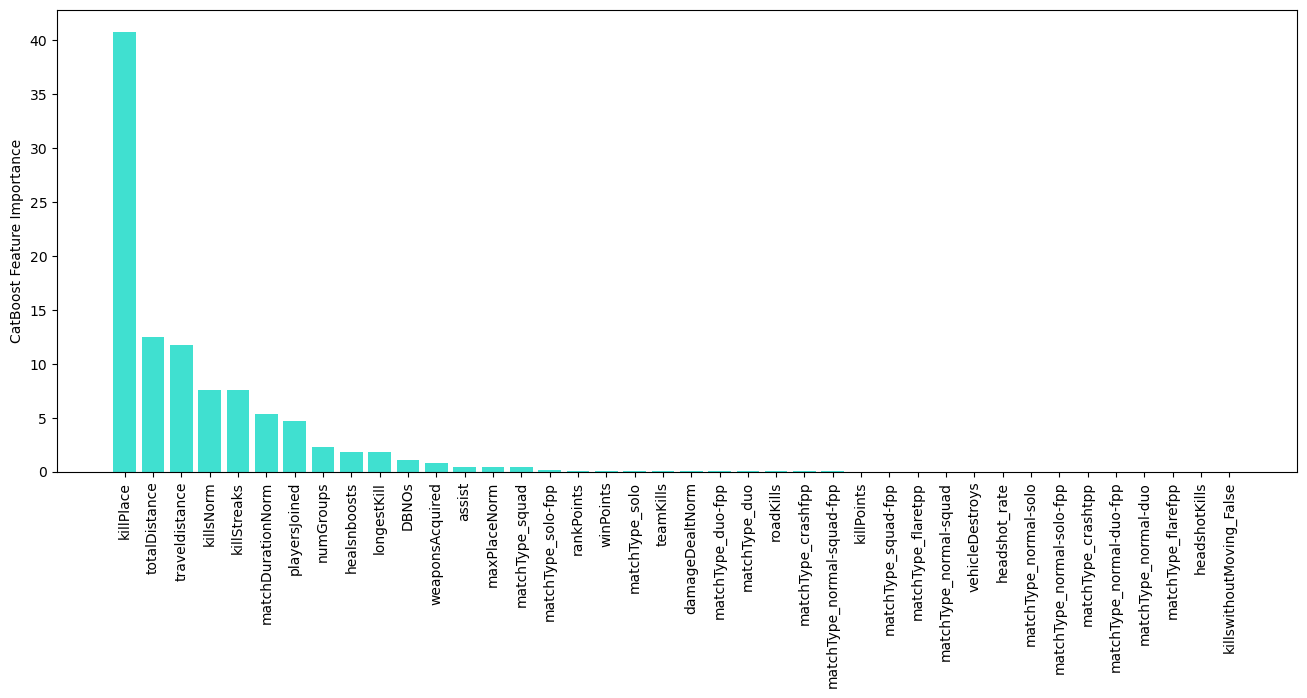

In [60]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

#### Prediction  

In [61]:
pred = model.predict(xtest)

In [62]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>